# Assignment 2
## Question 1: Zero-Order-Hold Discretization
$$
\begin{align}
x(t) =& e^{At}x_0+\int^{t}_{0}e^{A(t-\tau)}Bu(\tau)d\tau \\

\end{align}
$$
First, we can derive the properties, for given **time variable** $t_1$ and $t_2$
$$
\begin{align}
e^{A(t_1+t_2)} =& \sum^{\inf}_{k=0}\frac{1}{k!}A^k(t_1+t_2)^k\\
e^{At_1}\cdot e^{At_2} =& \sum^{\infty}_{k_1=0}\frac{1}{k!}A^k_1(t_1)^k_1 \cdot
                           \sum^{\infty}_{k_2=0}\frac{1}{k_2!}A^{k_2}(t_2)^{k_2}\\
                       =& \sum^{\infty}_{k_1=0} \sum^{\infty}_{k_2=0}A^{k_1+k_2}\frac{t_1^{k_1}t_2^{k_2}}{k_1!k_2!}
\end{align}
$$
To calculate the summation of all points from $[0,+\infty)$, we can sum them one point a a time, or we can sum them by using a moving slash line(show as figure below, in fact we exchanged the variables)

So the summation can be calculated in the direction of $k_{1}+k_2=n$
$$
\begin{align}
e^{At_1}\cdot e^{At_2} =& \sum^{\infty}_{n=0} \sum^{n}_{k=0}A^{n}\frac{t_1^{k}\cdot t_2^{(n-k)}}{k!(n-k)!}\\
                        =& \sum^{\infty}_{n=0}A^{n}\frac{(t_1+t_2)^{n}}{n!}\\
                        =& e^{A(t_1+t_2)}
\end{align}
$$

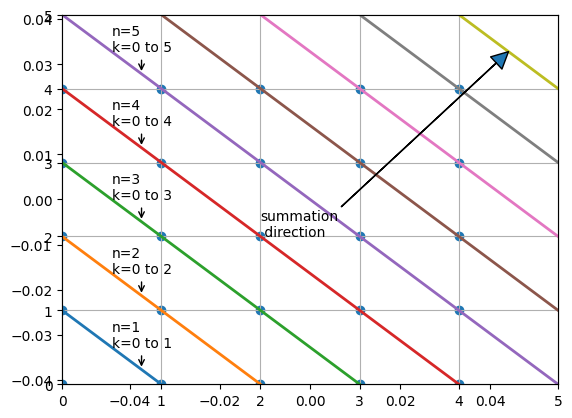

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = np.arange(0,5)
y = np.arange(0,5)
x_m,y_m = np.meshgrid(x,y)
plt.figure()
plt.axis('equal')
ax = plt.axes()
ax.scatter(x_m,y_m)
for i in range(1,10):
    xx = np.linspace(0,i,100)
    yy = i-xx
    ax.plot(xx,yy,linewidth=2)
    plt.annotate('n={}\nk=0 to {}'.format(i,i),xy=(0.8,i-1+0.2),xytext=(0.5,i-1+0.5),
                 arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))
plt.annotate('summation\n direction',xytext=(2,2),xy=(4.5,4.5),arrowprops=dict(width=0.2))
plt.grid()
plt.xlim([0,5])
plt.ylim([0,5])
plt.show()

Next part is about **Discretization**.$x(t)$is a continuous time signal only have value in $t>0$
$$
\begin{align}
x[n] =& x(t)\cdot \sum_{n=-\infty}^{\infty}\delta(t-n\delta t)\quad\\
    =& \sum_{n=0}^{\infty} x(n\delta t)\delta(t-n\delta t)\\
\end{align}

$$
when the signal pass through a linear system $h(t)$($h(t)$ only have value when $t>0$)
$$
\begin{align}
y(t) =& \int^{\infty}_{-\infty}\sum_{n=0}^{\infty} x(n\delta t)\delta(t-n\delta t)h(\tau)d\tau\\
    =& \int^{\infty}_{0}\sum_{n=0}^{\infty} x(n\delta t)\delta(t-n\delta t)h(\tau)d\tau\\
    =& \sum_{n=0}^{\infty}x(n\delta t)\int^{\infty}_{0}\delta(t-n\delta t)h(\tau)d\tau \\
    =& \sum_{n=0}^{\infty}x(n \delta t)h(t-n\delta t)
\end{align}
$$

For zero-order hold, $x[n]$ pass through $h(t) = u(t)-u(t-\delta t)$ and $y(t) = x(n\delta t)$ for $n\delta t<t<(n+1)\delta t$

$x_k$ is the kth term $x(n\delta t)$corresponds to $\delta(t-k\delta t)$

$$
x_k =x(k \delta t)= e^{Ak\delta t}x_0+\int^{k\delta t}_{0}e^{A(k\delta t-\tau)}Bu(\tau)d\tau
$$



$$
\begin{align}
x_{k+1} =& x(k \delta t+\delta t)= e^{Ak\delta t+\delta t}x_0+\int^{k\delta t+\delta t}_{0}e^{A(k\delta t+\delta t-\tau)}Bu(\tau)d\tau\\
    =& e^{\delta t} e^{Ak\delta t}x_{0}+
    e^{\delta t}\int^{k\delta t}_{0}e^{A(k\delta t-\tau)}Bu(\tau)d\tau+
    \int^{k\delta t+\delta t}_{k\delta t}e^{A(k\delta t+\delta t-\tau)}Bu(\tau)d\tau \\
    =& e^{\delta t} x_{k}+\int^{k\delta t+\delta t}_{k\delta t}e^{A(k\delta t+\delta t-\tau)}Bu(\tau)d\tau
\end{align}
$$
According to the question $u(t)$ is a zero-hold output $y_{u}(t)$ of original $u_{0}(t)$, so it is a constant $u_k$ on $k\delta t<t<k\delta t+\delta t$ and we have
$$
\begin{align}
\int^{k\delta t+\delta t}_{k\delta t}e^{A(k\delta t+\delta t-\tau)}Bu(\tau)d\tau=&
\int^{k\delta t+\delta t}_{k\delta t}e^{A(k\delta t+\delta t-\tau)}Bu_{k}d\tau\\
=&e^{A(k\delta t+\delta t)}\int^{k\delta t+\delta t}_{k\delta t}e^{-A\tau}Bu_{k}d\tau\\
=& e^{A(k\delta t+\delta t)}(e^{-Ak\delta t}-e^{-A(k\delta t+\delta t)}) A^{-1}Bu_k\\
=& (e^{A\delta t}-I) A^{-1}B\cdot u_k
\end{align}\\
where \quad \int e^{At}Bdt = A^{-1}e^{At}B+C=e^{At}A^{-1}B+C
$$
So $A_k = e^{\delta t}, B_k=(e^{A\delta t}-I)A^{-1}B$
$$
x_{k+1} = A_k x_k+B_k u_k
$$ 

## Question 2: Spatial Velocity
![image.png](img/cylinber.png)

### (1) 
The linear velocity of contact point C is $\frac{dC_x}{dt}=v$.
### (2)
The linear velocity of top point A is $\frac{dA_x}{dt}=2v$
### (3) 
Choose the center of the cylinber P as the body fixed point on axis.
The velocity of body fixed point currently coincides with C is
$$
v_c = v_p +\omega \times \overrightarrow{PC} 
$$
$$
^{o}v_c = ^{o}v_p + ^{o}\omega \times ^{o}\overrightarrow{PC} = [ 0,0,0 ]^T
$$
### (4)
The velocity of body fixed point currently coincides with A is
$$
v_a = v_p +\omega \times \overrightarrow{PA}
$$
$$
^{o}v_a = ^{o}v_p + ^{o}\omega \times ^{o}\overrightarrow{PA} = [ 2v,0,0 ]^T
$$
### (5)
The velocity of body fixed point currently coincides with O is
$$
v_o = v_p +\omega \times \overrightarrow{PO}\\
$$
$$
^{o}v_o = ^{o}v_p + ^{o}\omega \times ^{o}\overrightarrow{PO} = [ 0,0,\omega C_x ]^T
$$
$$
^{o}\nu  = [^{o}\omega, ^{o}v_p]^T = [ 0,\omega,0,0,0,\omega C_x]^T
$$
### (6)
The velocity of body fixed point currently coincides with C is
$$
v_c = v_p +\omega \times \overrightarrow{PC}\\
$$
$$
^{c}v_c = ^{c}v_p + ^{c}\omega \times ^{o}\overrightarrow{PC} = [ 0,0,0 ]^T
$$
$$
^{o}\nu = [^{c}\omega, ^{c}v_c]^T = [ 0,\omega,0,0,0,0]^T
$$

## Question 3: Twist
### (a) 
Position of point P
$$
^{s}p = ^{s}\overrightarrow{OP} = [L+dsin\theta,L-dcos\theta]^T
$$
### (b)
Velocity of point P
$$
\frac{d {^{s}p}}{dt} = [dcos\theta, dsin\theta,0]^T
$$
### (c)
The configuration of {b} seen from {s} is
$$
^{s}T_{b} = \begin{bmatrix}
 ^{s}R_b & ^{s}p_b\\
  0&1
\end{bmatrix} = \begin{bmatrix}
  c_\theta&  -s_\theta&  0&L+ds_\theta \\
  s_\theta&  c_\theta&  0& L-dc_\theta\\
  0&  0&  1& 0\\
  0&  0&  0& 1
\end{bmatrix}
$$
### (d)
Let the point r be the body fixed point in rotation axis.

The velocity of body fixed point corresponds to $O_b$ is
$$
^{b}v_p = ^{b}v_r+^b\omega \times ^{b}\overrightarrow{ro_b} = [d,0,0]^{T}
$$
 
The twist of $^{s}T_b$ in {b} is
$$
^b\nu = [0,0,1,d,0,0]
$$
### (e)
The velocity of body fixed point corresponds to $O_s$ is
$$
^{s}v_{o_s} = ^{s}v_r+^s\omega \times ^{s}\overrightarrow{ro_s} = [L,-L,0]^{T}
$$
 
The twist of $^{s}T_b$ in {s} is
$$
^s\nu = [0,0,1,L,-L,0]
$$
### (f)
$$
\begin{align}
^{s}\omega =& ^{s}R_{b} {^{b}\omega} \\
^{s}v_{o_b} =&  ^{s}R_{b} {^{b}v_{o_b}}+[^{s}p_b]{^{s}R_{b}} {^{b}\omega}
\end{align}
$$

### (g)
The linear velocity part of twist $^{b}\nu$ is $\dot{p}$ expressed in {b} frame.

### (h)
The linear velocity part of twist $^{s}\nu$ is $\dot{p} - ^{s}\omega \times p$.




## Question 4: Screw axis and its transformation
### (a)

screw pitch = 0.0


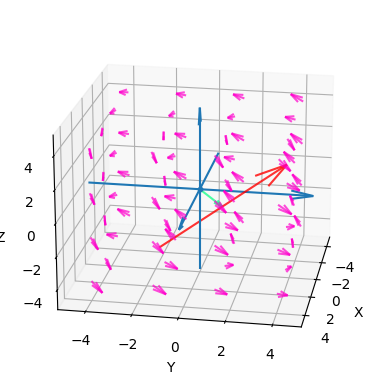

In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
w = np.array([0,2,2])
v = np.array([4,0,0])
s = w/np.linalg.norm(w)
theta_d = np.linalg.norm(w)
q = np.cross(w, v)/(np.linalg.norm(w)**2)
h = w.dot(v)/(np.linalg.norm(w))
print('screw pitch = {}'.format(h))
L = 4
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.grid()
ax.quiver(-5,0,0,1,0,0,normalize=True,length=10,arrow_length_ratio=0.1)
ax.quiver(0,-5,0,0,1,0,normalize=True,length=10,arrow_length_ratio=0.1)
ax.quiver(0,0,-5,0,0,1,normalize=True,length=10,arrow_length_ratio=0.1)
ax.quiver(0,0,0,q[0],q[1],q[2],normalize=True,length=np.linalg.norm(q),color=(0,1,0.5,0.7))
ax.quiver(q[0]-s[0]*L,q[1]-s[1]*L,q[2]-s[2]*L,s[0],s[1],s[2],normalize=True,length=2*L,arrow_length_ratio=0.2,color=(1, 0, 0, 0.8))
ax.scatter(0,0,0,'linewidth',10)
ax.set_xlabel('X')
ax.set_xlim3d(-5, 5)
ax.set_ylabel('Y')
ax.set_ylim3d(-5, 5)
ax.set_zlabel('Z')
ax.set_zlim3d(-5, 5)
x = np.linspace(-4,4,4)
y = np.linspace(-4,4,4)
z = np.linspace(-4,4,4)
x_,y_,z_ = np.meshgrid(x,y,z)
x_ = np.reshape(x_,(1,np.size(x_)))
y_ = np.reshape(y_,(1,np.size(y_)))
z_ = np.reshape(z_,(1,np.size(z_)))
p = np.vstack([x_,y_,z_])
v_ = np.zeros((3,np.size(x_)))
for i in range(np.size(x_)):
    v_[:,i] = v+np.cross(w,p[:,i])
# t = np.linspace(0,2,100)
# dt = t[1]-t[0]
# p = np.zeros((3,np.size(t)))
# v_mat = np.zeros((3,np.size(t)))
# p[:,0] = np.array([0.1,-0.2,-0.2])
# for i in range(np.size(p,1)-1):
#     v_p = v+np.cross(w, p[:,i])
#     v_mat[:,i] = v_p
#     p[:,i+1] = p[:,i]+v_p*dt
# ax.plot3D(p[0,:],p[1,:],p[2,:],'black',linewidth=2)
ax.quiver(x_,y_,z_,v_[0,:],v_[1,:],v_[2,:],normalize=True,length=0.8,color=(1,0,0.8,0.7),arrow_length_ratio=0.8)
ax.view_init(elev=20, azim=10)
plt.show()